 # COVID-19 predictor

Import the necessary libraries

In [342]:
# data processing library

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization library 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


Import the dataset

Assign it to a variable called covid_dataset.

In [533]:
covid_dataset = pd.read_csv(r'C:\Users\Surface\Downloads\Covid_Dataset.csv')
covid_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [534]:
# Take a look at the datatypes
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [491]:
# How many rows and columns does the dataset have?
covid_dataset.shape

(5434, 21)

If we look at the column names in our dataset, we will find the trailing whitespace problem.

In [536]:
covid_dataset.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

We can remove this by calling map on the columns list and stripping the whitespace with strip.

In [537]:
#  The map function is applied to Series objects, whereas the apply and applymap functions are called on Dataframes.
covid_dataset.columns = covid_dataset.columns.map(str.strip)
covid_dataset.columns


Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [493]:
#covid_dataset.keys()

In [494]:
covid_dataset.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [495]:
covid_dataset.head().T

,0,1,2,3,4
Breathing Problem,Yes,Yes,Yes,Yes,Yes
Fever,Yes,Yes,Yes,Yes,Yes
Dry Cough,Yes,Yes,Yes,Yes,Yes
Sore throat,Yes,Yes,Yes,No,Yes
Running Nose,Yes,No,Yes,No,Yes
Asthma,No,Yes,Yes,Yes,No
Chronic Lung Disease,No,Yes,Yes,No,Yes
Headache,No,Yes,Yes,No,Yes
Heart Disease,No,No,No,Yes,Yes
Diabetes,Yes,No,Yes,Yes,Yes


In [496]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

#Preprocessing the data
# Converting string labels into numbers No=0 and Yes=1.

covid_dataset =  covid_dataset.apply(LabelEncoder().fit_transform)
covid_dataset


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


info about our data after transformation

In [497]:
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int32
 1   Fever                                    5434 non-null   int32
 2   Dry Cough                                5434 non-null   int32
 3   Sore throat                              5434 non-null   int32
 4   Running Nose                             5434 non-null   int32
 5   Asthma                                   5434 non-null   int32
 6   Chronic Lung Disease                     5434 non-null   int32
 7   Headache                                 5434 non-null   int32
 8   Heart Disease                            5434 non-null   int32
 9   Diabetes                                 5434 non-null   int32
 10  Hyper Tension                            5434 non-null   int32
 11  Fati

In [498]:
covid_dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Breathing Problem,5434.0,0.666176,0.471621,0.0,0.0,1.0,1.0,1.0
Fever,5434.0,0.786345,0.409924,0.0,1.0,1.0,1.0,1.0
Dry Cough,5434.0,0.792602,0.405480,0.0,1.0,1.0,1.0,1.0
Sore throat,5434.0,0.727457,0.445309,0.0,0.0,1.0,1.0,1.0
Running Nose,5434.0,0.543246,0.498172,0.0,0.0,1.0,1.0,1.0
Asthma,5434.0,0.462643,0.498648,0.0,0.0,0.0,1.0,1.0
Chronic Lung Disease,5434.0,0.472028,0.499263,0.0,0.0,0.0,1.0,1.0
Headache,5434.0,0.503497,0.500034,0.0,0.0,1.0,1.0,1.0
Heart Disease,5434.0,0.464299,0.498770,0.0,0.0,0.0,1.0,1.0
Diabetes,5434.0,0.476261,0.499482,0.0,0.0,0.0,1.0,1.0


In [499]:
# number of missing values in the dataset
missing_values = covid_dataset.isnull().sum() 

# missing value percent %
percent_missing = missing_values / covid_dataset.shape[0]*100 

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}

#Constructing DataFrame from a dictionary 
frame = pd.DataFrame(value) 
frame


,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


Our data is clean 0 missing values

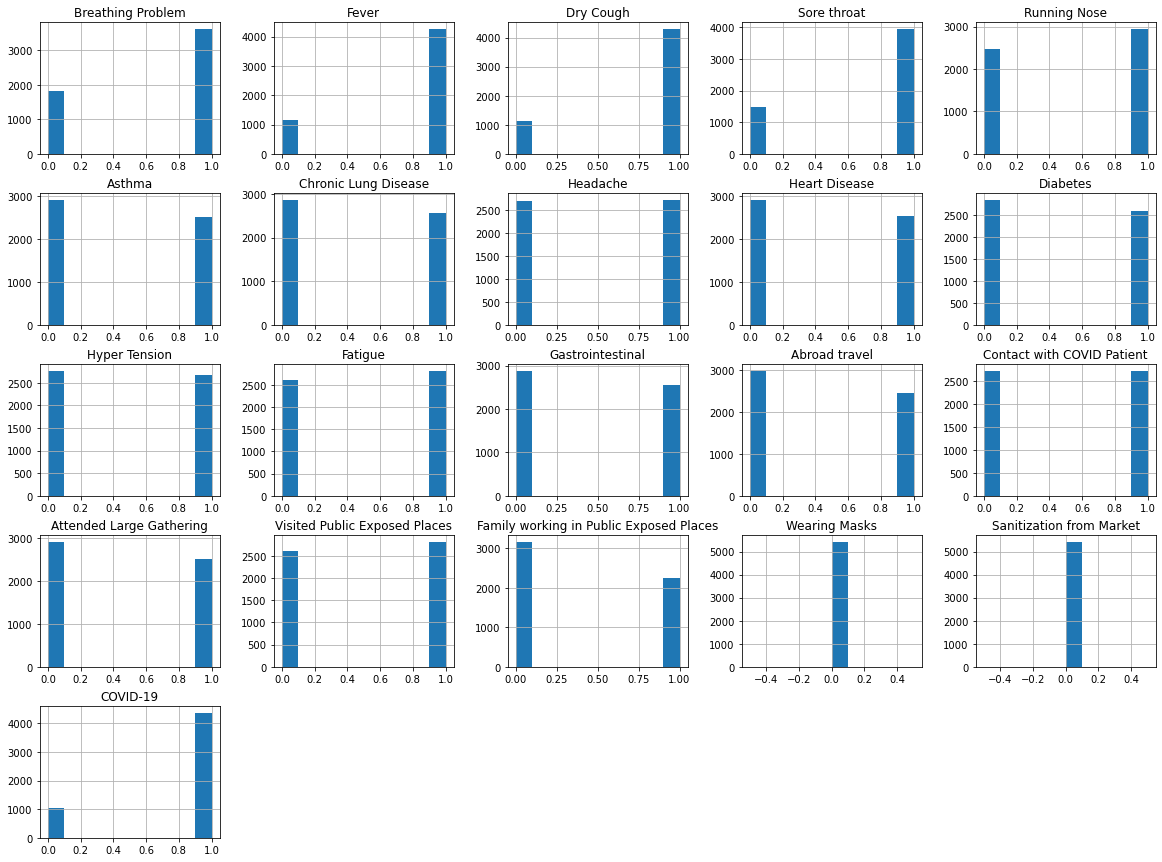

In [500]:
covid_dataset.hist(figsize=(20,15));

# Data vizualisation

COVID-19 is the target

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

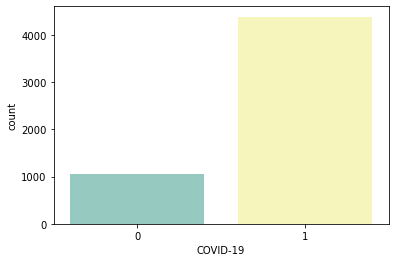

In [501]:
sns.countplot(x = 'COVID-19', data = covid_dataset , palette = "Set3")

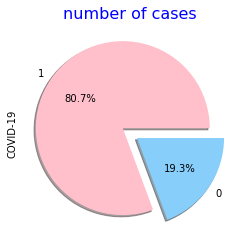

In [502]:
# use autopact to display the percent value using Python string formatting

colors = ['pink' , 'lightskyblue']
p = covid_dataset["COVID-19"].value_counts()
p.plot.pie(explode=[0.1,0.1],colors = colors,autopct='%1.1f%%',shadow=True)
plt.title('number of cases', fontsize=16, color="blue");

Breathing Problem

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

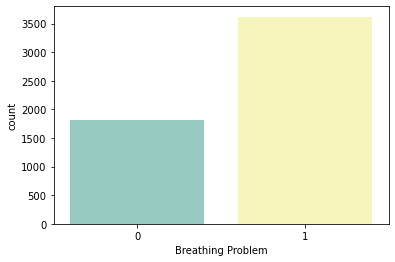

In [359]:
sns.countplot(x='Breathing Problem',data=covid_dataset, palette = "Set3")

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

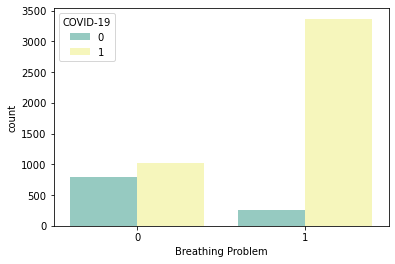

In [360]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_dataset, palette = "Set3")

Fever

<AxesSubplot:xlabel='Fever', ylabel='count'>

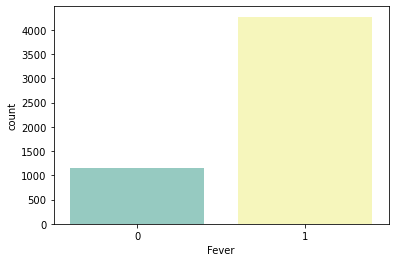

In [361]:
sns.countplot(x='Fever',data=covid_dataset, palette = "Set3")

<AxesSubplot:xlabel='Fever', ylabel='count'>

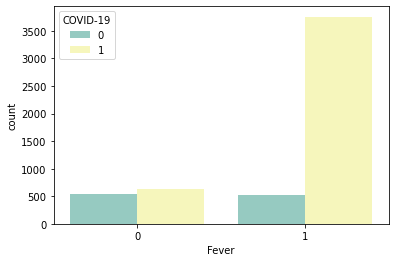

In [362]:
sns.countplot(x='Fever',hue='COVID-19',data=covid_dataset, palette = "Set3")

Dry Cough

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

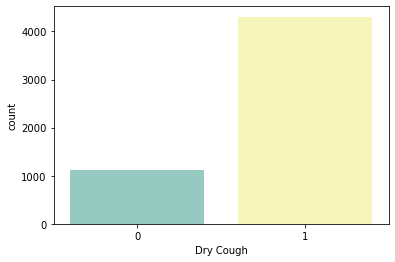

In [363]:
sns.countplot(x='Dry Cough',data=covid_dataset, palette = "Set3")

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

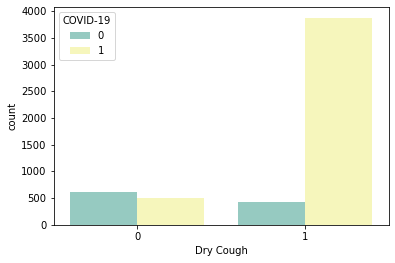

In [364]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_dataset, palette = "Set3")

Sore throat

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

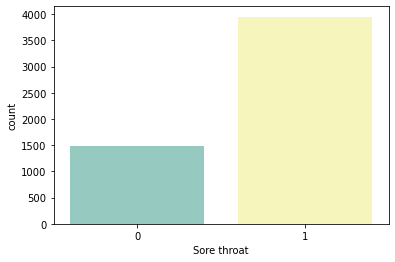

In [365]:
sns.countplot(x='Sore throat',data=covid_dataset, palette = "Set3")

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

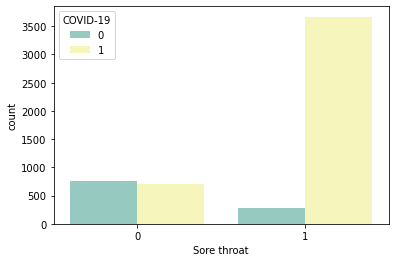

In [366]:
sns.countplot(x='Sore throat',hue='COVID-19',data=covid_dataset, palette = "Set3")

<AxesSubplot:xlabel='Visited Public Exposed Places', ylabel='count'>

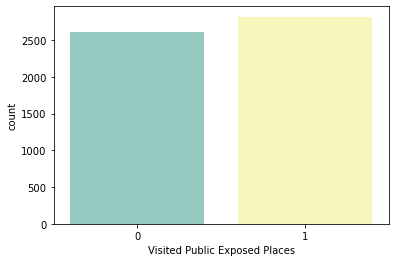

In [367]:
sns.countplot(x='Visited Public Exposed Places',data=covid_dataset, palette = "Set3")

<AxesSubplot:xlabel='Visited Public Exposed Places', ylabel='count'>

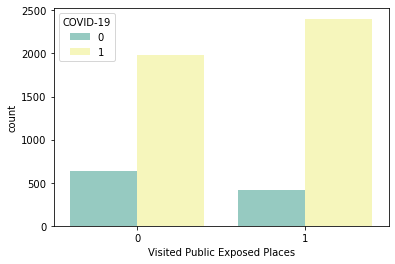

In [368]:
sns.countplot(x='Visited Public Exposed Places',hue='COVID-19',data=covid_dataset, palette = "Set3")

Correlation betwenn features

In [503]:
Correlation = covid_dataset.corr()

Correlation.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


The main cause to get affected with COVID-19 as appear in the Correlation is (Breathing Problem,Fever, Sore throat, Abroad travel,Fever, Attended Large Gathering)

In [370]:
covid_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Preparing Data

feature that we gonna delelte :

Running Nose / Asthma /Chronic Lung Disease / Headache
/ Heart Disease / Diabetes / Fatigue / Gastrointestinal
/ Wearing Masks / Sanitization from Market

In [374]:
# We can remove this by calling map on the columns list and stripping the whitespace with strip. The map function is applied to Series objects, whereas the apply and applymap functions are called on Dataframes.


In [371]:

covid_dataset   =    covid_dataset.drop('Running Nose',axis=1)
covid_dataset   =    covid_dataset.drop('Asthma',axis=1)
covid_dataset   =    covid_dataset.drop('Chronic Lung Disease',axis=1)
covid_dataset   =    covid_dataset.drop('Headache',axis=1)
covid_dataset   =    covid_dataset.drop('Heart Disease',axis=1)
covid_dataset   =    covid_dataset.drop('Fatigue',axis=1)
covid_dataset   =    covid_dataset.drop('Diabetes',axis=1)
covid_dataset   =    covid_dataset.drop('Gastrointestinal',axis=1)
covid_dataset   =    covid_dataset.drop('Wearing Masks',axis=1)
covid_dataset   =    covid_dataset.drop('Sanitization from Market',axis=1)



In [372]:
covid_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,0,1,1,0,1
2,1,1,1,1,0,1,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,0,0,0,0,0,0,1
5430,1,1,1,0,1,0,0,0,0,0,1
5431,1,1,1,0,1,0,0,0,0,0,0
5432,1,1,1,0,0,0,0,0,0,0,0


In [375]:
Correlation = covid_dataset.corr()

Correlation.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


# SPLITTING THE DATASET

In [376]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [377]:
x   =  covid_dataset.drop('COVID-19',axis=1)
y   =  covid_dataset['COVID-19']


In [554]:
x

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places
0,1,1,1,1,1,0,1,0,1,1
1,1,1,1,1,0,0,0,1,1,0
2,1,1,1,1,0,1,0,0,0,0
3,1,1,1,0,0,1,0,1,1,0
4,1,1,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,0,0,0,0,0,0
5430,1,1,1,0,1,0,0,0,0,0
5431,1,1,1,0,1,0,0,0,0,0
5432,1,1,1,0,0,0,0,0,0,0


In [553]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5429    1
5430    1
5431    0
5432    0
5433    0
Name: COVID-19, Length: 5434, dtype: int32

In [520]:
x.shape

(5434, 10)

In [519]:
y.shape

(5434,)

 test-train split

In [526]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Training The Model Using LogisticRegression

In [551]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Score/Accuracy
acc_logreg=model.score(X_test, y_test)
acc_logreg

0.9625996321275291